# Road Accident Severity Prediction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import libraries
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Train_data.csv")

In [5]:
df.head()

Unnamed: 0 Age_band_of_driver Sex_of_driver   Educational_level  \
0         521              31-50          Male  Junior high school   
1        3761              18-30          Male   Elementary school   
2        6537              31-50          Male  Junior high school   
3        3952            Unknown          Male  Junior high school   
4        3265              18-30          Male         High school   

  Vehicle_driver_relation Driving_experience  \
0                Employee         Above 10yr   
1                Employee         Above 10yr   
2                Employee             5-10yr   
3                   Owner              1-2yr   
4                Employee              2-5yr   

                                   Lanes_or_Medians Types_of_Junction  \
0                       Double carriageway (median)           Y Shape   
1  Two-way (divided with broken lines road marking)       No junction   
2                                 Undivided Two way       No junction   
3  Two-way (divided with broken lines road marking)           Y Shape   
4                                 Undivided Two way       No junction   

  Road_surface_type       Light_conditions Weather_conditions  \
0     Asphalt roads               Daylight             Normal   
1     Asphalt roads  Darkness - lights lit             Normal   
2       Earth roads               Daylight             Normal   
3     Asphalt roads               Daylight             Normal   
4     Asphalt roads               Daylight             Normal   

                Type_of_collision Vehicle_movement  \
0      Collision with pedestrians   Going straight   
1  Vehicle with vehicle collision   Going straight   
2  Vehicle with vehicle collision   Going straight   
3  Vehicle with vehicle collision   Going straight   
4  Vehicle with vehicle collision         Turnover   

                                 Pedestrian_movement  \
0  Crossing from nearside - masked by parked or s...   
1                                   Not a Pedestrian   
2                                   Not a Pedestrian   
3                                   Not a Pedestrian   
4                                   Not a Pedestrian   

            Cause_of_accident  Accident_severity  
0      No priority to vehicle                  2  
1               No distancing                  2  
2  Changing lane to the right                  1  
3   No priority to pedestrian                  2  
4               No distancing                  2

In [6]:
df.columns

Index(['Unnamed: 0', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
# print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       11084 non-null  object
 1   Sex_of_driver            11084 non-null  object
 2   Educational_level        11084 non-null  object
 3   Vehicle_driver_relation  11084 non-null  object
 4   Driving_experience       11084 non-null  object
 5   Lanes_or_Medians         11084 non-null  object
 6   Types_of_Junction        11084 non-null  object
 7   Road_surface_type        11084 non-null  object
 8   Light_conditions         11084 non-null  object
 9   Weather_conditions       11084 non-null  object
 10  Type_of_collision        11084 non-null  object
 11  Vehicle_movement         11084 non-null  object
 12  Pedestrian_movement      11084 non-null  object
 13  Cause_of_accident        11084 non-null  object
 14  Accident_severity        11084 non-nul

In [9]:
# Find the number of missing values present in each column
df.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

#### Target variable classes distribution and visualization

2    9379
1    1563
0     142
Name: Accident_severity, dtype: int64


<Axes: >

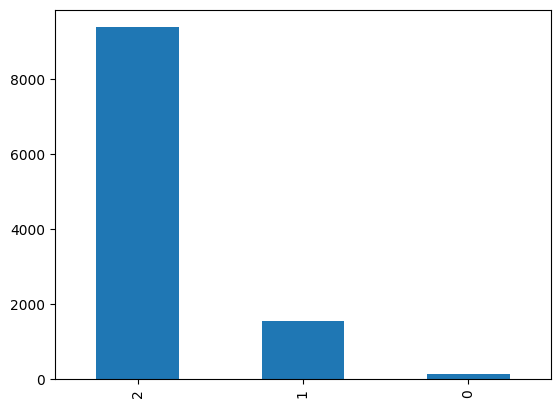

In [10]:
# target variable classes counts and bar plot
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

###### Target variable classes are highly imbalanced

#### Exploratory data analysis of the dataset
#### Let’s find out the education levels of drivers

<Axes: >

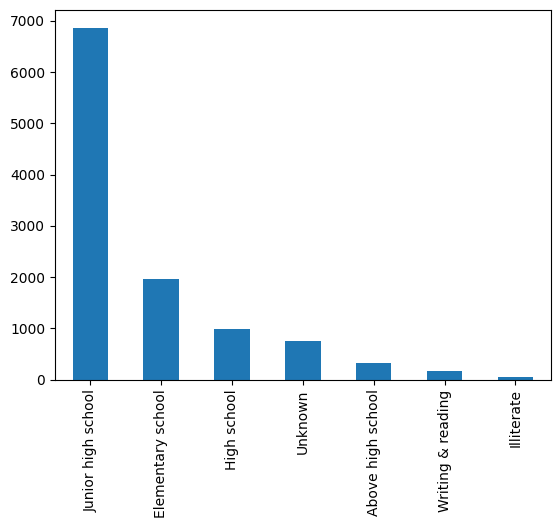

In [11]:
# Education levels of car drivers
df['Educational_level'].value_counts().plot(kind='bar')


We can see more than 6000 drivers are having education up to junior high school, and only a fraction of drivers have education above high school.

#### Association between the ‘road surface type’ column and target ‘accident severity’

<function matplotlib.pyplot.show(close=None, block=None)>

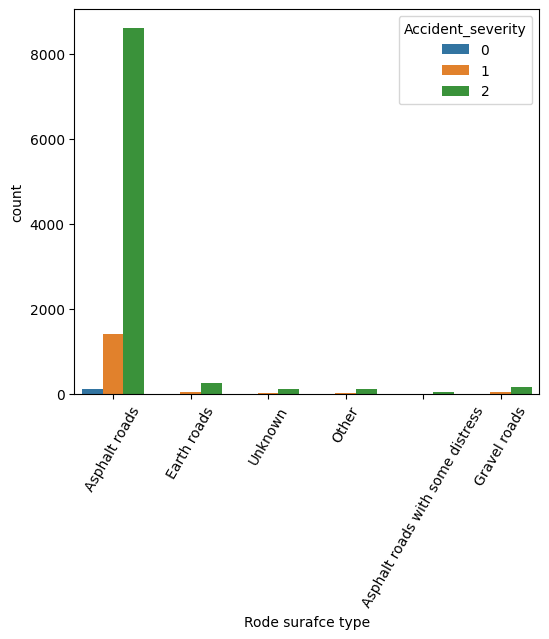

In [12]:
# plot the bar plot of road_surface_type and accident severity feature
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

We can learn that most accidents happened on “asphalt roads” in our dataset, followed by “earth roads.” Here we can say that most fatal injuries occur on asphalt roads, so they might not be a significant variable to predict the target class.

Now, based on the above findings, we will preprocess the raw data for modeling and evaluation purposes.

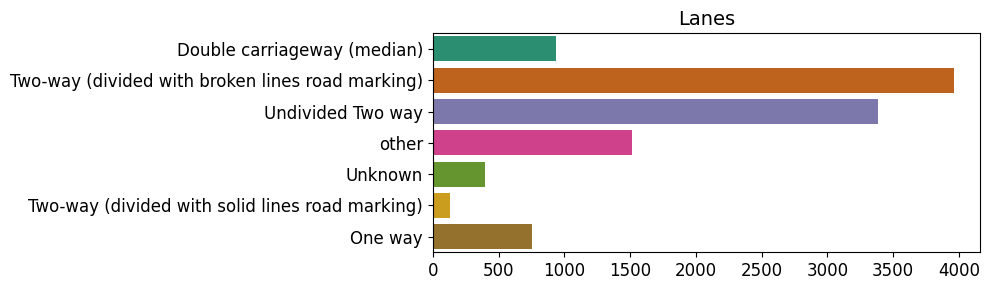

In [13]:
# checking the Lanes column

plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<ipython-input-14-69e8ca67e3d3>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


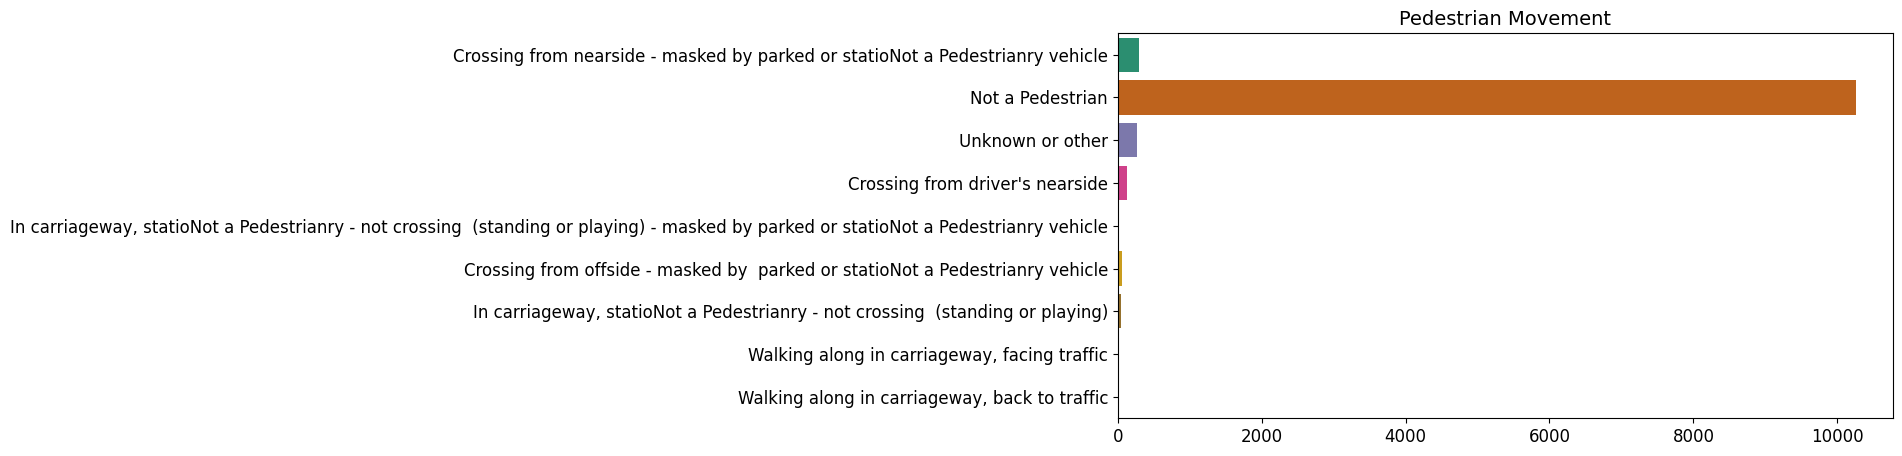

In [14]:
# Checking the Pedestrian Movement column

plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       11084 non-null  object
 1   Sex_of_driver            11084 non-null  object
 2   Educational_level        11084 non-null  object
 3   Vehicle_driver_relation  11084 non-null  object
 4   Driving_experience       11084 non-null  object
 5   Lanes_or_Medians         11084 non-null  object
 6   Types_of_Junction        11084 non-null  object
 7   Road_surface_type        11084 non-null  object
 8   Light_conditions         11084 non-null  object
 9   Weather_conditions       11084 non-null  object
 10  Type_of_collision        11084 non-null  object
 11  Vehicle_movement         11084 non-null  object
 12  Pedestrian_movement      11084 non-null  object
 13  Cause_of_accident        11084 non-null  object
 14  Accident_severity        11084 non-nul

In [16]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

#### One-Hot encoding using ‘get_dummies()’ method

In [17]:
# Categorical features to encode using one hot encoding
features = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident']

In [18]:
# setting input features X and target y
X = df[features]  # here features are selected from 'object' datatype
y = df['Accident_severity']

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(11084, 99)

#### Target encoding using ‘LabelEncoder()’ method

In [19]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

In [20]:
# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: [0 1 2]


#### Feature selection using the ‘Chi2’ Statistic

In [21]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

We are selecting the top 50 features out of 99 features from the encoded dataframe and storing them in a new dataframe object called “fs_df.” The “Chi2” statistic is used when the target feature is a categorical variable, and the “Pearson’s coefficient” is used when the target feature is a continuous variable.

In [22]:
fs_df

Age_band_of_driver_31-50  Age_band_of_driver_Over 51  \
0                             1                           0   
1                             0                           0   
2                             1                           0   
3                             0                           0   
4                             0                           0   
...                         ...                         ...   
11079                         0                           0   
11080                         1                           0   
11081                         1                           0   
11082                         0                           0   
11083                         1                           0   

       Age_band_of_driver_Under 18  Age_band_of_driver_Unknown  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           1   
4                                0                           0   
...                            ...                         ...   
11079                            0                           0   
11080                            0                           0   
11081                            0                           0   
11082                            0                           0   
11083                            0                           0   

       Sex_of_driver_Unknown  Educational_level_High school  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              1   
...                      ...                            ...   
11079                      0                              0   
11080                      0                              0   
11081                      0                              0   
11082                      0                              1   
11083                      0                              0   

       Vehicle_driver_relation_Owner  Driving_experience_2-5yr  \
0                                  0                         0   
1                                  0                         0   
2                                  0                         0   
3                                  1                         0   
4                                  0                         1   
...                              ...                       ...   
11079                              0                         1   
11080                              0                         0   
11081                              0                         0   
11082                              0                         0   
11083                              0                         0   

       Driving_experience_Below 1yr  Driving_experience_No Licence  ...  \
0                                 0                              0  ...   
1                                 0                              0  ...   
2                                 0                              0  ...   
3                                 0                              0  ...   
4                                 0                              0  ...   
...                             ...                            ...  ...   
11079                             0                              0  ...   
11080                             0                              0  ...   
11081                             0                              0  ...   
11082                             1                              0  ...   
11083                             0                              0  ...   

      

In [23]:
y_en

0        2
1        2
2        1
3        2
4        2
        ..
11079    2
11080    1
11081    2
11082    2
11083    2
Length: 11084, dtype: int64

#### Model Building

#### Random Forest

In [24]:
# import the necessary liabrary
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(fs_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score
rf.score(X_trn, y_trn)

0.8802300665388519

In [25]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.22      0.01      0.01       313
           2       0.85      1.00      0.92      1885

    accuracy                           0.85      2217
   macro avg       0.36      0.33      0.31      2217
weighted avg       0.75      0.85      0.78      2217



In [26]:
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.7817712360098399


Now, we have developed a random forest model with n_estimators = 800 and max_depth = 20. We will evaluate this model on test data to validate the results and make predictions based on new input data.

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()
lr.fit(X_trn,y_trn)
predics=lr.predict(X_tst)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
predics

array([2, 2, 2, ..., 2, 2, 2])

In [30]:
classification_report(y_tst,predics)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        19\n           1       0.00      0.00      0.00       313\n           2       0.85      1.00      0.92      1885\n\n    accuracy                           0.85      2217\n   macro avg       0.28      0.33      0.31      2217\nweighted avg       0.72      0.85      0.78      2217\n'

In [31]:
confusion_matrix(y_tst,predics)

array([[   0,    0,   19],
       [   0,    0,  313],
       [   0,    0, 1885]])

In [32]:
lr.score(X_trn,y_trn)

0.845156197135446

#### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = DecisionTreeClassifier(random_state = 0)

In [35]:
dtc.fit(X_trn,y_trn)
predics=dtc.predict(X_tst)

In [36]:
predics


array([2, 1, 2, ..., 2, 2, 2])

In [37]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

              precision    recall  f1-score   support

           0       0.03      0.05      0.04        19
           1       0.20      0.17      0.18       313
           2       0.86      0.87      0.86      1885

    accuracy                           0.76      2217
   macro avg       0.36      0.36      0.36      2217
weighted avg       0.76      0.76      0.76      2217

0.7602776265470716


#### Support Vector classifier

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(random_state = 0)
svc.fit(X_trn,y_trn)
predics=svc.predict(X_tst)

In [40]:
predics

array([2, 2, 2, ..., 2, 2, 2])

In [41]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00       313
           2       0.85      1.00      0.92      1885

    accuracy                           0.85      2217
   macro avg       0.28      0.33      0.31      2217
weighted avg       0.72      0.85      0.78      2217

0.7814322947077753


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Report

#### Road-Traffic-Severity-Classification


This is a multiclass classification project to classify the severity of road accidents into three categories. this project is based on real-world data and the dataset is also highly imbalanced.

Problem Statement: The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 15 features step-by-step by going through each day's task. Your metric for evaluation will be f1-score